<a href="https://colab.research.google.com/github/ecealptekin/Null-Hypothesis/blob/master/sample_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS210 Spring 2019 - Sample Final Project 
# Group No: ...
# NBA Dataset Exploration 

#### Group Members:
- ...
- ...
- ...

![](https://static01.nyt.com/images/2019/03/17/sports/17lakers-knicks-web1/merlin_152236902_5137d65d-45c4-4ef9-ae6f-915a5f104d28-threeByTwoSmallAt2X.jpg)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [0]:
from os.path import join
from pprint import pprint

In [0]:
d_path = "./data"
d_file = "nba_players.csv"

In [0]:
df = pd.read_csv(join(d_path, d_file))

In [0]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# Project Description

In this project, our goal is to display statistical facts in different NBA seasons through self-explanatory visualizations and tables regarding various aspects such as 

- The effect of age on players' performance?
- The relationship between different attributes of a player
- Top performers in different fields
- Individual player statistics

At the end, we aim to perform predictive analysis based on player performances.

# Dataset

We obtained the dataset from [Kaggle](https://www.kaggle.com/drgilermo/nba-players-stats) as raw csv. The dataset includes individual performances of each player from **1950 to 2017** with **52 attributes**. We have **24658 unique players** that are present in the dataset. Most of the attributes are of float data type with the exception of player name, position, team name and year. You may find the related information below.

In [0]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 24658, number of columns: 52


In [0]:
df["Player"].unique().shape  # getting unique player count

(3921,)

In [0]:
df.dtypes  # data types of each column

Year      float64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
blanl     float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
blank2    float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

# Preprocessing

Here, we will first take a look at the NaN values and try come up with different methods to deal with them.  
In addition, we'll check if there exists any column to be added.

### Dealing with NaN values 

In [0]:
df.isnull().sum()  # NaN counts in each column

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6454
MP          553
PER         590
TS%         153
3PAr       5850
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24658
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24658
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5762
3PA        5762
3P%        9273
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         924
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

In [0]:
na_ratios = df.isnull().sum() / n_rows  # finding the NaN value ratio of each column
                                        # it returns a series object with column names as indices
na_ratios

Year      0.002717
Player    0.002717
Pos       0.002717
Age       0.003042
Tm        0.002717
G         0.002717
GS        0.261741
MP        0.022427
PER       0.023927
TS%       0.006205
3PAr      0.237246
FTr       0.006732
ORB%      0.158123
DRB%      0.158123
TRB%      0.126531
AST%      0.086625
STL%      0.158123
BLK%      0.158123
TOV%      0.207194
USG%      0.204842
blanl     1.000000
OWS       0.004299
DWS       0.004299
WS        0.004299
WS/48     0.023927
blank2    1.000000
OBPM      0.157920
DBPM      0.157920
BPM       0.157920
VORP      0.157920
FG        0.002717
FGA       0.002717
FG%       0.006732
3P        0.233677
3PA       0.233677
3P%       0.376065
2P        0.002717
2PA       0.002717
2P%       0.007908
eFG%      0.006732
FT        0.002717
FTA       0.002717
FT%       0.037473
ORB       0.157920
DRB       0.157920
TRB       0.015370
AST       0.002717
STL       0.157920
BLK       0.157920
TOV       0.204639
PF        0.002717
PTS       0.002717
dtype: float

We can see that columns **"blanl"** and **"blank2"** are completely empty. Let's remove them with `drop` function.

In [0]:
df.drop(["blanl", "blank2"], axis=1, inplace=True)  # set inplace to True
                                                    # to apply the changes to the dataframe

Now, let's check if there are any patterns between NaN rows, starting with ***"Year"** column.

In [0]:
df[df["Year"].isnull()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It turns out that whenever the **"Year"** row is NaN, the rest of the columns also have NaN. So, we can remove these rows without any concern. In order to remove them, we can extract the index values of these rows and provide it to `drop` function.

In [0]:
index2drop = df[df["Year"].isnull()].index  # we use the index attribute here
                                            # since, we have a dataframe
df.drop(index2drop, inplace=True)

Now, let's check the NaN values one more time. There seems to be a pattern between different attributes. We can use one of these attributes to observe the pattern.

In [0]:
df.isnull().sum()

Year         0
Player       0
Pos          0
Age          8
Tm           0
G            0
GS        6387
MP         486
PER        523
TS%         86
3PAr      5783
FTr         99
ORB%      3832
DRB%      3832
TRB%      3053
AST%      2069
STL%      3832
BLK%      3832
TOV%      5042
USG%      4984
OWS         39
DWS         39
WS          39
WS/48      523
OBPM      3827
DBPM      3827
BPM       3827
VORP      3827
FG           0
FGA          0
FG%         99
3P        5695
3PA       5695
3P%       9206
2P           0
2PA          0
2P%        128
eFG%        99
FT           0
FTA          0
FT%        857
ORB       3827
DRB       3827
TRB        312
AST          0
STL       3827
BLK       3827
TOV       4979
PF           0
PTS          0
dtype: int64

Now, we can convert ***Year*** column to datetime object.

In [0]:
# converting float year column to datetime object
df["Year"] = pd.to_datetime(df["Year"].astype(np.int32), format="%Y")

In [0]:
df[df["ORB"].isnull()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950-01-01,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950-01-01,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950-01-01,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950-01-01,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950-01-01,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950-01-01,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950-01-01,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950-01-01,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950-01-01,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,1950-01-01,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,0.362,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [0]:
df[df["ORB"].isnull()]["Year"].describe()

count                    3827
unique                     24
top       1950-01-01 00:00:00
freq                      312
first     1950-01-01 00:00:00
last      1973-01-01 00:00:00
Name: Year, dtype: object

It seems that **"Year"** column has an effect. Let's apply a filter on **"Year"** column so that we end up with an era in which NBA started to become a global phenomena. The first three-point shot is recorded on [October 12, 1979](http://www.wikizero.biz/index.php?q=aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvVGhyZWUtcG9pbnRfZmllbGRfZ29hbA), that is also the season when the rivalry between Magic Johnson and Larry Bird started.

In [0]:
df = df[df["Year"] > datetime(1979, 1, 1)]  # filtering on year column

In [0]:
df.isnull().sum()

Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS         692
MP           0
PER          5
TS%         76
3PAr        88
FTr         88
ORB%         5
DRB%         5
TRB%         5
AST%         5
STL%         5
BLK%         5
TOV%        61
USG%         5
OWS          0
DWS          0
WS           0
WS/48        5
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       3511
2P           0
2PA          0
2P%        117
eFG%        88
FT           0
FTA          0
FT%        744
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64

Still, we have NaN values on some columns such as `FT%`, `FG%`, `3P%` and `2P%`. We can fill the NaN values on these columns.

In [0]:
matchings = {
    "FT%" : {
        "made": "FT",
        "attempted": "FTA"
    },
    "FG%": {
        "made": "FG",
        "attempted": "FGA"
    },
    "3P%": {
        "made": "3P",
        "attempted": "3PA"
    },
    "2P%": {
        "made": "2P",
        "attempted": "2PA"
    }
}

def compute_percentage(row, *args):
    """
    fills NaN values by computing made / attempted
    """
    percentage_attr = args[0]
    
    made = row[matchings[percentage_attr]["made"]]
    attempted = row[matchings[percentage_attr]["attempted"]]
    
    return made / attempted if attempted > 0 else 0  # to prevent zero division

for attr in matchings.keys():  # iterate over columns in which NaNs exist
    df.loc[df[attr].isnull(), [attr]] = df[df[attr].isnull()].apply(compute_percentage, axis=1, args=([attr]))

In [0]:
def compute_3PAr(row):
    """
    computes the share of 3-point shot attemps
    """
    two_points = row["2PA"]
    three_points = row["3PA"]
    total = two_points + three_points
    
    return three_points / total if total > 0 else 0

df.loc[df["3PAr"].isnull(), ["3PAr"]] = df[df["3PAr"].isnull()].apply(compute_3PAr, axis=1) 

In [0]:
df.isnull().sum()  # let's leave other NaN values as they are

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS        692
MP          0
PER         5
TS%        76
3PAr        0
FTr        88
ORB%        5
DRB%        5
TRB%        5
AST%        5
STL%        5
BLK%        5
TOV%       61
USG%        5
OWS         0
DWS         0
WS          0
WS/48       5
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
2P          0
2PA         0
2P%         0
eFG%       88
FT          0
FTA         0
FT%         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

# Data Exploration

Now, let's observe the distributions of specific columns, namely **games played** and **points**.

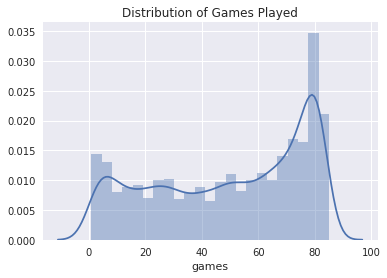

In [0]:
sns.distplot(df["G"].values, norm_hist=True)  # games played

plt.xlabel("games")
plt.title("Distribution of Games Played")
plt.show()

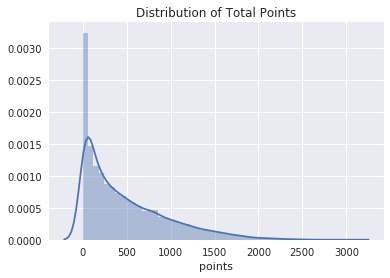

In [0]:
sns.distplot(df["PTS"], norm_hist=True)  # points

plt.xlabel("points")
plt.title("Distribution of Total Points")
plt.show()

Here, we can see that most players completed the season around 80 games. In addition, points distribution seems to obey the power law.

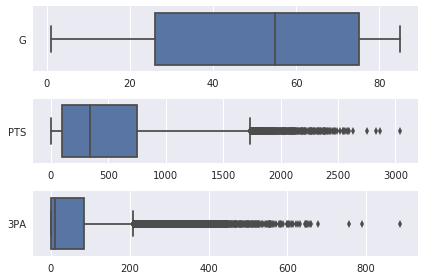

In [0]:
plt.subplot(3,1,1)
sns.boxplot(data=df[["G"]], orient="h")

plt.subplot(3,1,2)
sns.boxplot(data=df[["PTS"]], orient="h")

plt.subplot(3,1,3)
sns.boxplot(data=df[["3PA"]], orient="h")

plt.tight_layout()  # auto. positioning of subplots
plt.show()

With box plots, we are able to observe the outliers in different columns. For example, **games played** has no outliers since we have a balanced distribution; while **points** and **3-point attempts** have many outliers.

We analyse how attributes relate to each other.

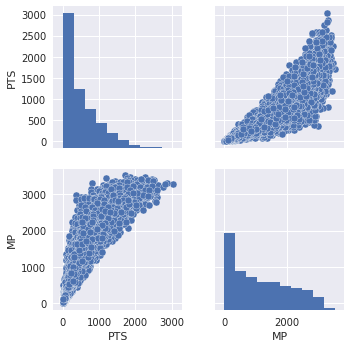

In [0]:
cols2plot = ["PTS", "MP"]
sns.pairplot(data=df, vars=cols2plot)

plt.show()

As expected, as **minutes played** increases, we see an exponential increase in the **points**.

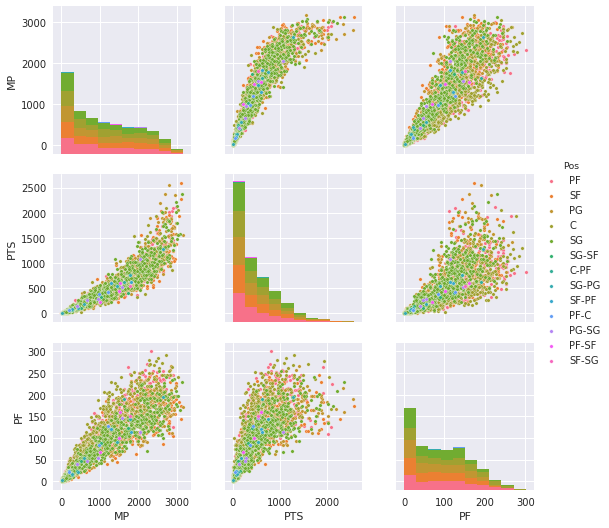

In [0]:
cols2plot = ["MP", "PTS", "PF"]

# applying a filter on year
sns.pairplot(data=df[df["Year"] > datetime(2012,1,1)], vars=cols2plot, hue="Pos", markers=".")
plt.show()

### Extracting Some Insights

In [0]:
top5scorers = df.groupby(by="Player").sum()["PTS"].sort_values(ascending=False)[:5]
print(top5scorers)

Player
Karl Malone*         36928.0
Kobe Bryant          33643.0
Michael Jordan*      32292.0
Dirk Nowitzki        30260.0
Shaquille O'Neal*    29428.0
Name: PTS, dtype: float64


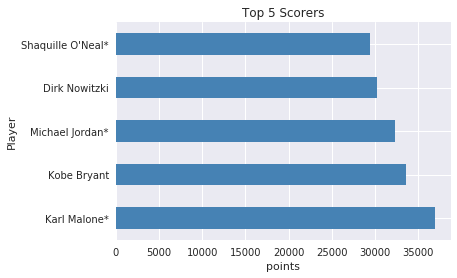

In [0]:
top5scorers.plot(kind="barh", color="steelblue")  # does not match with the official list
                                                  # since we removed some of the veterans

plt.xlabel("points")
plt.title("Top 5 Scorers")
plt.show()

This is not the official list, since we removed some players when we discarded pre-1980 era.

#### How does age affect points made?

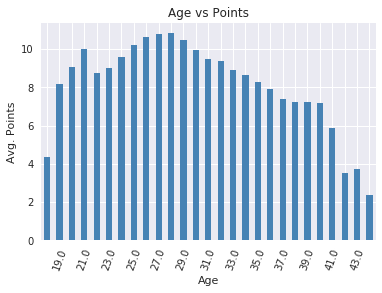

In [0]:
min_age = df["Age"].min()
max_age = df["Age"].max()

age_group = df.groupby(by="Age").sum()  # group by age and take sum of each column
pts_game = age_group["PTS"] / age_group["G"]  # find pts avg. at each age

ax = pts_game.plot(kind="bar",
                   color="steelblue",
                   rot=70)

for tick in ax.xaxis.get_major_ticks()[::2]:  # just to make it more readable
    tick.label1.set_visible(False)            # hiding some xticks

plt.ylabel("Avg. Points")
plt.title("Age vs Points")
plt.show()

Again, as expected, as **age** increases, we observe a dramatic change for the **points**. 

#### Stephen Curry Shot Selection in Each Season

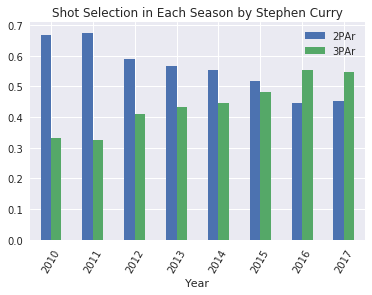

In [0]:
df["2PAr"] = 1 - df["3PAr"]  # adding the two point shot rate column

player = "Stephen Curry"
player_df = df[df["Player"] == player]

player_df.set_index(player_df["Year"].dt.strftime("%Y"), inplace=True)  # change index to display
                                                                        # years as xticks

player_df[["2PAr", "3PAr"]].plot.bar(rot=60)
plt.title("Shot Selection in Each Season by {}".format(player))
plt.show()

He just likes to shoot the ball from the distance.

# Hypothesis Testing

#### How did Golden State Warriors affect the league?

There is an ongoing debate regarding the shot selections in NBA. Teams strated to focus more on three points shots and changed their game plans accordingly. Some of the experts credit Golden State Warriors as the initiater team, beacuse of players like Curry and Thompson. You can learn more about the discussion from this [link.](https://www.pinnacle.com/en/betting-articles/Basketball/three-point-shots-nba/VPN2MLSADYW5FPZL)

Let's check if we can see such a phenomena in our dataset.

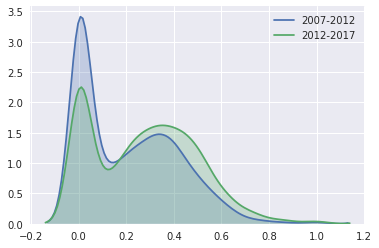

In [0]:
base_year = 1990
gw_year = 2012

# checking 3-point shot attemps 
past_df = df[(df["Year"] < datetime(2012, 1, 1)) & (df["Year"] >= datetime(2007, 1, 1))]
gs_df = df[df["Year"] > datetime(2012, 1, 1)]

ax = sns.kdeplot(past_df["3PAr"].rename("2007-2012"), shade=True)
sns.kdeplot(gs_df["3PAr"].rename("2012-2017"), ax=ax, shade=True)

plt.show()

The difference between two terms is visible. Now, let's apply a significance test to statistically approve this difference. Here, we created two different samples, before and after 2012. Since we have two samples, we simply decided to apply two-sample t-test to show that two eras are different in terms of 3-point shot attempts. Below, you may find the hypothesis statements.

$H_0 \rightarrow \mu_{pre-2012-3PAr} = \mu_{post-2012-3PAr}$  
$H_A \rightarrow \mu_{pre-2012-3PAr} \neq \mu_{post-2012-3PAr}$

In [0]:
# extracting values
past_values = past_df["3PAr"].values
gs_era = gs_df["3PAr"].values

In [0]:
# two-sided test for the null hypothesis that 2 independent samples 
# have identical average (expected) values
_, p_value = stats.ttest_ind(a=past_values, b=gs_era, equal_var=False)
p_value

6.465471390702545e-34

We set the significance level as 0.05 as general.  
Based on the value of obtained p_value, we can **reject** the null hypothesis.